# Работа 16. Треугольник и парабола.

# Задача №1

Дан треугольник ABC с вершинами A(0; 2), B(6; 4), C(8; 0). Найти его площадь.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import math
from scipy.integrate import dblquad
import sympy as sym
from sympy.solvers.diophantine.diophantine import length

AB = 6.324555320336759
AC = 8.246211251235321
BC = 4.47213595499958
Площадь треугольника = 14


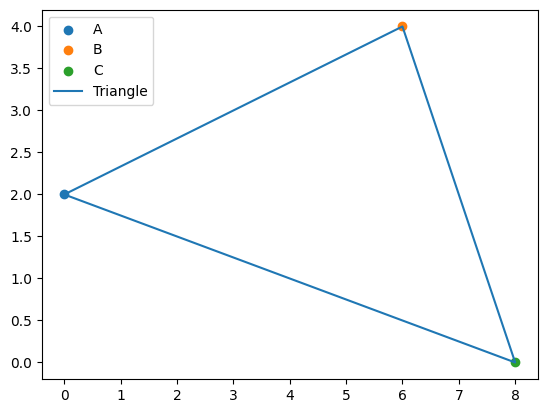

In [ ]:
# Координаты вершин треугольника 
A = np.array([0, 2]) 
B = np.array([6, 4]) 
C = np.array([8, 0])

# Вычисляем площадь треугольника 
AB = ((B[0] - A[0]) ** 2 + (B[1] - A[1]) ** 2) ** 0.5
AC = ((C[0] - A[0]) ** 2 + (C[1] - A[1]) ** 2) ** 0.5
BC = ((C[0] - B[0]) ** 2 + (C[1] - B[1]) ** 2) ** 0.5
print("AB =", AB)
print("AC =", AC)
print("BC =", BC)
pol = (AB + AC + BC) / 2 # полупериметр
S = (pol * (pol - AB) * (pol - AC) * (pol - BC)) ** 0.5
S = round(S) 
print("Площадь треугольника =", S)

# Рисуем треугольник
plt.scatter(A[0], A[1], label='A')
plt.scatter(B[0], B[1], label='B')
plt.scatter(C[0], C[1], label='C')
plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], label='Triangle')
plt.legend()
plt.show()

# Задача №2

Найти уравнение прямой y = k * x + b, проходящей через середину отрезка BC и делящую треугольник на две равные по площади части.

Прямая имеет вид у = 0.0x + 2.0


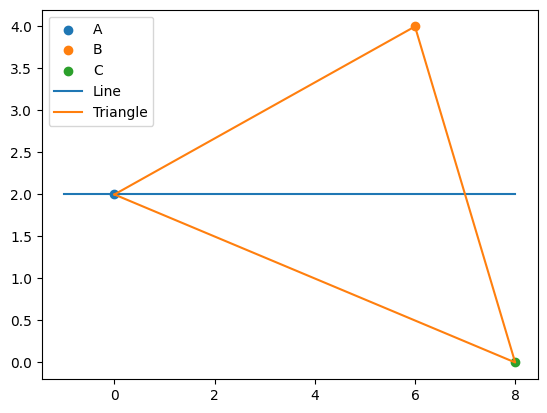

In [ ]:
def line(q, w):
    k = (w[1] - q[1]) / (w[0] - q[0])
    c = w[1] - k * w[0]
    print("Прямая имеет вид у = " + str(k) + "x + " + str(c))

    # Рисуем треугольник с прямой
    draw(k, c)


def draw(k, c):
    x0 = np.arange(-1, 9, 1)
    y0 = k * x0 + c


    plt.scatter(A[0], A[1], label='A')
    plt.scatter(B[0], B[1], label='B')
    plt.scatter(C[0], C[1], label='C')
    plt.plot(x0, y0, label='Line')
    plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], label='Triangle')
    plt.legend()
    plt.show()


sAB = ([(B[0] - A[0]), (B[1] - A[1])])
seredBC = ([(C[0] + B[0]) / 2, (C[1] + B[1]) / 2])
line(sAB, seredBC)

# Задача №3

Найти уравнение параболы y = a * x ^ 2 + F, делящей треугольник на две части с отношением площадей 1 : 2. Найти количество решений при a = 1. При каких F решение существует? Построить график зависимости F(a), т.е. значения F при заданных a (учитывая при этом количество решений).

In [ ]:
y_1 = 1/3 * x + 2
y_2 = -2 * x + 16
y_3 = -0.25 * x + 2

NameError: ignored

In [ ]:
# какая-то попытка
# Вычисляем площади двух треугольников разделенных параболой 
k = 2  # соотношение площадей (1:2) 
S1 = S / (k + 1) 
S2 = S - S1 
print("S1 =", S1) 
print("S2 =", S2) 

S1 = 4.666666666666667
S2 = 9.333333333333332


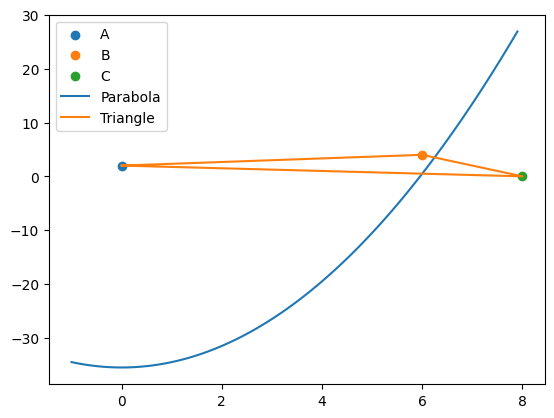

In [ ]:
# Создаем массив x для отрисовки параболы 
a = 1
x = np.arange(-1, 8, 0.1) 
# Вычисляем y для отрисовки параболы 
F = -35.5
y = a * x ** 2 + F
 
plt.scatter(A[0], A[1], label='A')
plt.scatter(B[0], B[1], label='B')
plt.scatter(C[0], C[1], label='C')
plt.plot(x, y, label='Parabola')
plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], label='Triangle')
plt.legend()
plt.show()

In [ ]:
def find_wrong_sol(sol, x1, x2, y1, y2):
    true_sol = []
    for p in sol:
        if ((p[0] >= x1) and (p[0] <= x2)) or ((p[1] >= y1) and (p[1] <= y2)):
            true_sol += [p]
    return true_sol


def distance(point1, point2):
    # Вычисляем расстояние между двумя точками
    return ((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2) ** 0.5

In [ ]:
def Area1(F):
    A = (0, 2)
  
    x, y = sym.symbols('x y')
    a = 1

    eq1 = a * x ** 2 + F -y #парабола
    eq3 = 1/3 * x + 2 -y #AB
    eq4 = -0.25 * x + 2 -y #AC

    sol2 = sym.solve((eq1, eq3), (x, y))
    sol3 = sym.solve((eq1, eq4), (x, y))

    sol3 = find_wrong_sol(sol3, 0, 8, 0, 2)
    sol2 = find_wrong_sol(sol2, 0, 6, 2, 4)

    for i in sol2:
        if ( i != A):
            F = i
    for i in sol3:
        if ( i != A):
            G = i
  
    # длины сторон
    dAF = distance(A, F)
    dAG = distance(A, G)
    dGF = distance(G, F)

    # полупериметр
    p = (dAF + dGF + dAG) / 2
    # площадь
    S = (p * (p - dAF) * (p - dGF) * (p - dAG)) ** 0.5
    #S = round(S, 10)

  
    return S

In [ ]:
def Area2(F):
    C = (8, 0)
  
    x, y = sym.symbols('x y')
    a = 1

    eq1 = a * x ** 2 + F -y #парабола
    eq3 = -2 * x + 16 -y #BC
    eq4 = -0.25 * x + 2 -y #AC

    sol2 = sym.solve((eq1, eq3), (x, y))
    sol3 = sym.solve((eq1, eq4), (x, y))

    sol3 = find_wrong_sol(sol3, 0, 8, 0, 2)
    sol2 = find_wrong_sol(sol2, 6, 8, 0, 4)

    for i in sol2:
        if ( i != C):
            F = i
    for i in sol3:
        if ( i != C):
            G = i

    # длины сторон
    dCF = distance(C, F)
    dCG = distance(C, G)
    dGF = distance(G, F)

    # полупериметр
    p = (dCF + dGF + dCG) / 2
    # площадь
    S = (p * (p - dCF) * (p - dGF) * (p - dCG)) ** 0.5
    #S = round(S, 10)

  
    return S

In [ ]:
F1 = range(-36, -13, 1)

for f in F1:
    print(f, Area1(f))
    if Area1(f) == 4.666:
        print(f)

TypeError: ignored

In [ ]:
F2 = range(-64, -33)

for f in F2:
    print(f, Area2(f))
    #if Area1(f) == 4.666:
     #   print(f)

TypeError: ignored

In [ ]:
# y_1 = 1/3 * x + 2
# 
# y_2 = -2 * x + 16
# 
# y_3 = -0.25 * x + 2

# Задача № 4

Построить трёхмерный график зависимости F от координат точки C, т.е. F(xc, yc) при a = 3.

In [ ]:
for a, F in range(-100, 100, 0.1):
    y0 = a * x0 ** 2 + F

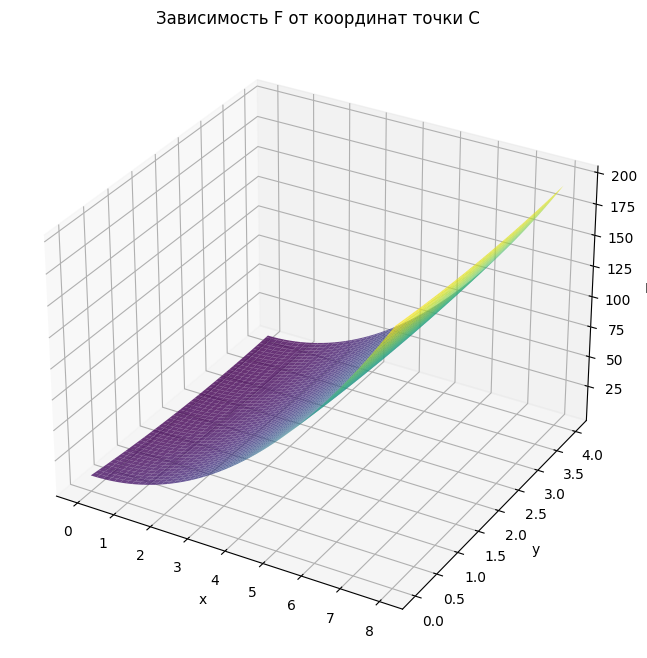

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d


def F(x, y):
    return 3 * x ** 2 + (y - 3) ** 2


xc = np.linspace(0, 8, 100)
yc = np.linspace(0, 4, 100)

X, Y = np.meshgrid(xc, yc)
Z = F(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('F')
plt.title('Зависимость F от координат точки C')
plt.show()